In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [139]:
df=pd.read_excel('marketing_campaign.xlsx')

In [140]:
df.shape

(2240, 29)

In [141]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## Setting Display options to ensure feature name visibility

In [142]:
pd.set_option('display.max_columns',None)

## Warning Supression

In [143]:
import warnings
warnings.filterwarnings('ignore')

## Droping ID Column

In [144]:
df=df.drop(['ID'], axis=1)

## Defining Target and Independent Features

In [145]:
type(df['Response'])

pandas.core.series.Series

In [146]:
Y=df[['Response']]
X=df.drop(['Response'], axis=1)

### Get the Response Rate

In [147]:
Y.mean()

Response    0.149107
dtype: float64

## Build Derived Features - Customer Age and Tenure

In [148]:
import pandas as pd
from datetime import datetime

current_year = datetime.now().year
X['current_date'] = datetime.now().date()
X['Age'] = current_year - X['Year_Birth']
X = X.drop('current_date', axis=1)
X.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Age
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,67
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,70
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,59
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,40
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,43


In [149]:

X['Dt_Customer'] = pd.to_datetime(X['Dt_Customer'])
X['Current_Date'] = pd.to_datetime(datetime.today().strftime('%Y-%m-%d'))
X['Cust_tenure_days'] = (X['Current_Date'] - X['Dt_Customer']).dt.days
X['Cust_tenure'] = (X['Cust_tenure_days'] / 365.25)
X = X.drop('Cust_tenure_days', axis=1)
X = X.drop('Current_Date', axis=1)
X = X.drop('Year_Birth', axis=1)
X['Cust_tenure'] = X['Cust_tenure'].apply(lambda x:round(x,0))

print(X)

       Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  \
0     Graduation         Single  58138.0        0         0  2012-09-04   
1     Graduation         Single  46344.0        1         1  2014-03-08   
2     Graduation       Together  71613.0        0         0  2013-08-21   
3     Graduation       Together  26646.0        1         0  2014-02-10   
4            PhD        Married  58293.0        1         0  2014-01-19   
...          ...            ...      ...      ...       ...         ...   
2235  Graduation        Married  61223.0        0         1  2013-06-13   
2236         PhD       Together  64014.0        2         1  2014-06-10   
2237  Graduation       Divorced  56981.0        0         0  2014-01-25   
2238      Master       Together  69245.0        0         1  2014-01-24   
2239         PhD        Married  52869.0        1         1  2012-10-15   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0          58       635    

## Spit features into Numerical and Categorial

In [150]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [151]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
df_value_counts=pd.DataFrame(num.apply(lambda x : unique_levels(x)))

In [152]:
df_value_counts.columns=['feature_levels']
df_value_counts.head()

,feature_levels
Income,1974
Kidhome,3
Teenhome,3
Recency,100
MntWines,776


In [153]:
slice1=df_value_counts.loc[df_value_counts['feature_levels']<=20]
cat_list=slice1.index
cat=num.loc[:,cat_list]
cat.dtypes

Kidhome                  int64
Teenhome                 int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Cust_tenure            float64
dtype: object

In [154]:
def data_type_converter(x):
    x=x.astype('object')
    return(x)
cat=cat.apply(lambda x : data_type_converter(x))
cat.dtypes

Kidhome                object
Teenhome               object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Z_CostContact          object
Z_Revenue              object
Cust_tenure            object
dtype: object

In [155]:
slice2=df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list=slice2.index
num=num.loc[:,num_list]

In [156]:
char=pd.concat([char,cat], axis=1, join="inner")

In [157]:
print("The shape of numerical dataframe:", num.shape)
print("The shape of categorial datarame:", char.shape)

The shape of numerical dataframe: (2240, 9)
The shape of categorial datarame: (2240, 18)


## Outlier Analysis of Numerical Feature

In [158]:
num.describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.85, 0.90, 0.99])

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,55.194196
std,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,11.984069
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000
1%,7579.200000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,32.000000
5%,18985.500000,4.000000,3.000000,0.000000,4.000000,0.000000,0.000000,1.000000,36.000000
10%,24117.500000,9.000000,6.000000,0.000000,7.000000,0.000000,0.000000,3.000000,40.000000
25%,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,47.000000
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,54.000000
75%,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,65.000000


## Capping and flooring of outliers

In [159]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)
    

In [160]:
num=num.apply(lambda x: outlier_cap(x))

In [161]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,51770.277076,49.101786,302.909821,26.158482,165.075446,37.351366,26.873687,43.770089,55.132143
std,20728.704775,28.949501,333.316827,39.208270,216.547373,53.985910,40.484302,51.118104,11.666094
min,7579.200000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,32.000000
1%,7646.520000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,32.000000
5%,18985.500000,4.000000,3.000000,0.000000,4.000000,0.000000,0.000000,1.000000,36.000000
10%,24117.500000,9.000000,6.000000,0.000000,7.000000,0.000000,0.000000,3.000000,40.000000
25%,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,47.000000
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,54.000000
75%,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,65.000000


## Missing Value Handling - Numerical Features

In [162]:
num.isnull().mean()

Income              0.010714
Recency             0.000000
MntWines            0.000000
MntFruits           0.000000
MntMeatProducts     0.000000
MntFishProducts     0.000000
MntSweetProducts    0.000000
MntGoldProds        0.000000
Age                 0.000000
dtype: float64

## Missing value Value Handling - Numerical Features (Imputation With Mean)

In [163]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
num_1=pd.DataFrame(imputer.fit_transform(num), index=num.index, columns=num.columns)

In [164]:
num_1.isnull().mean()

Income              0.0
Recency             0.0
MntWines            0.0
MntFruits           0.0
MntMeatProducts     0.0
MntFishProducts     0.0
MntSweetProducts    0.0
MntGoldProds        0.0
Age                 0.0
dtype: float64

## Missing Value Handling - Categorical Features

In [165]:
char.isnull().mean()

Education              0.0
Marital_Status         0.0
Kidhome                0.0
Teenhome               0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Cust_tenure            0.0
dtype: float64

## Feature Selection - Numerical Features
## Part 1: Remove Features with 0 Variance

In [166]:
from sklearn.feature_selection import VarianceThreshold

varselector=VarianceThreshold(threshold=0)
varselector.fit_transform(num_1)
# Get columns to keep and create new datafraem with those only
cols = varselector.get_support(indices=True)
num_2 = num_1.iloc[:, cols]

In [167]:
num_2.iloc[0]

Income              58138.0
Recency                58.0
MntWines              635.0
MntFruits              88.0
MntMeatProducts       546.0
MntFishProducts       172.0
MntSweetProducts       88.0
MntGoldProds           88.0
Age                    67.0
Name: 0, dtype: float64

## Part 2 - Bi Variate Analysis (Feature Discretization)

In [168]:
from sklearn.preprocessing import KBinsDiscretizer
discrete = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_2), index=num_2.index, columns=num_2.columns).add_suffix('_Rank')
num_binned.head(10)

,Income_Rank,Recency_Rank,MntWines_Rank,MntFruits_Rank,MntMeatProducts_Rank,MntFishProducts_Rank,MntSweetProducts_Rank,MntGoldProds_Rank,Age_Rank
0,5.0,5.0,8.0,8.0,9.0,8.0,7.0,8.0,8.0
1,4.0,3.0,1.0,1.0,0.0,1.0,1.0,2.0,8.0
2,7.0,2.0,7.0,7.0,6.0,7.0,5.0,6.0,6.0
3,1.0,2.0,1.0,3.0,3.0,3.0,2.0,1.0,1.0
4,6.0,9.0,4.0,6.0,6.0,6.0,6.0,3.0,1.0
5,6.0,1.0,7.0,6.0,5.0,0.0,6.0,3.0,5.0
6,5.0,3.0,5.0,7.0,6.0,6.0,7.0,5.0,4.0
7,2.0,3.0,3.0,4.0,4.0,2.0,1.0,4.0,0.0
8,1.0,2.0,1.0,0.0,3.0,2.0,2.0,0.0,3.0
9,0.0,6.0,2.0,0.0,0.0,0.0,1.0,3.0,9.0


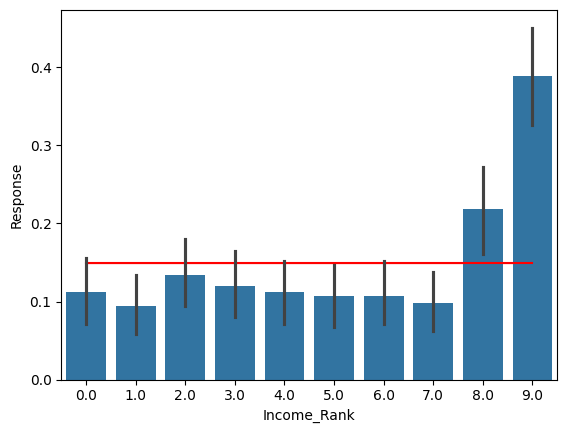

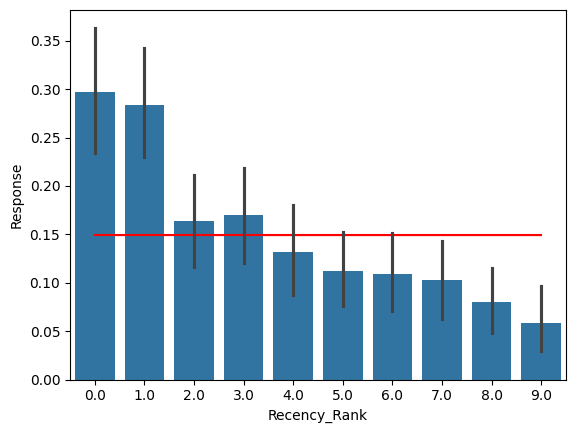

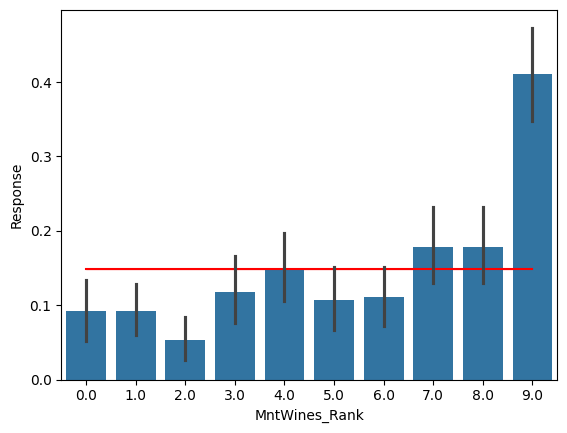

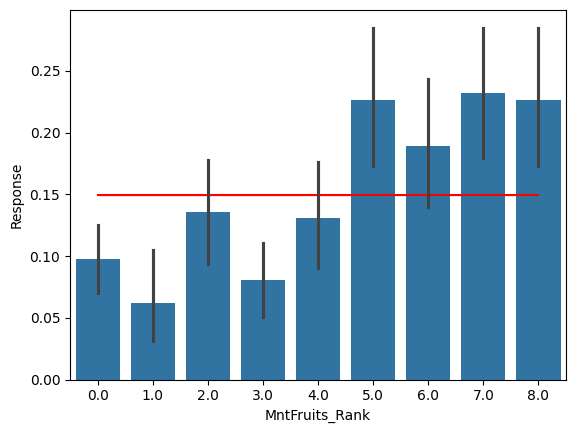

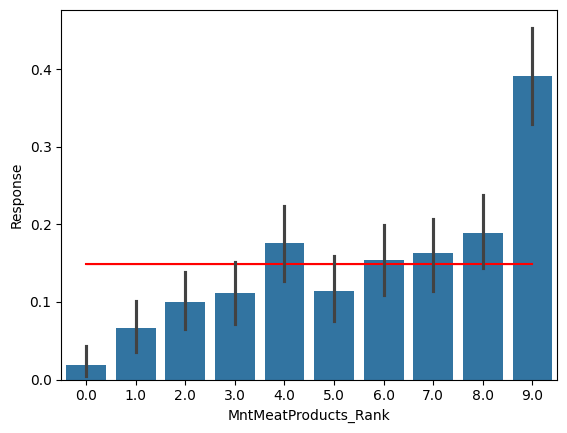

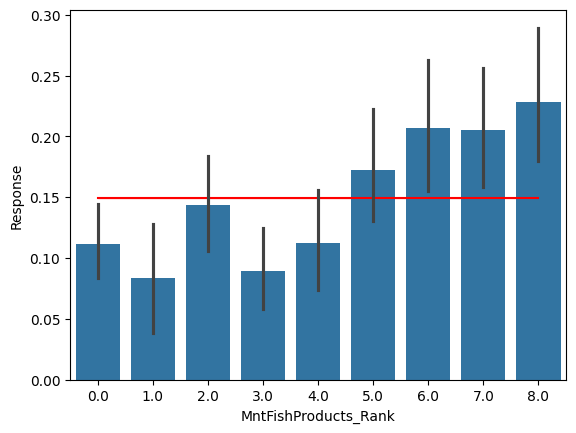

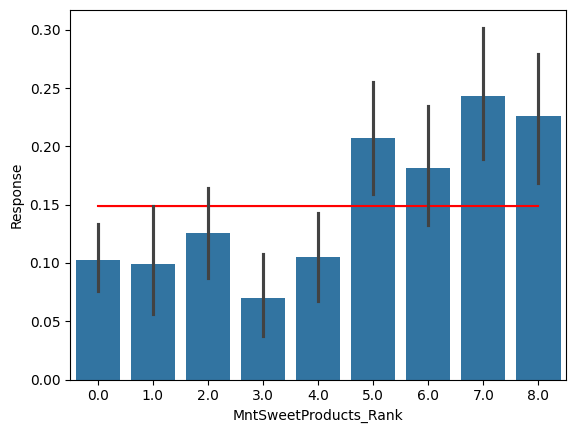

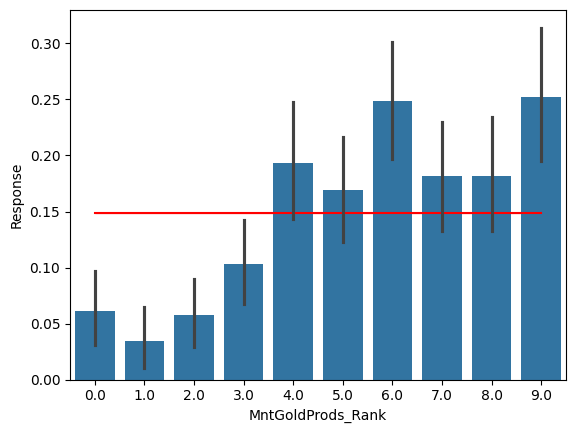

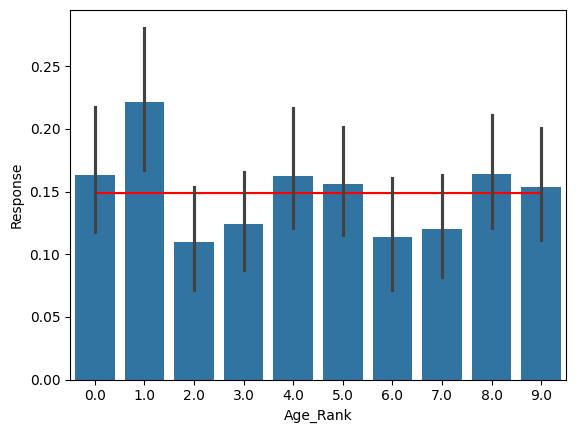

In [169]:
X_bin_combined=pd.concat([Y,num_binned], axis=1, join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col, y=X_bin_combined['Response'].mean(), data=X_bin_combined, color='red')
    sns.barplot(x=col, y='Response', data=X_bin_combined, estimator=mean)
plt.show()    

In [170]:
num_droplist=['Age']
num_2=num_2.drop(num_droplist, axis=1)
num_2.shape

(2240, 8)

## Part 3 - Select K Best

In [171]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=6)
selector.fit_transform(num_2, Y)
cols= selector.get_support(indices=True)
select_features_df_num = num_1.iloc[:,cols]

In [172]:
select_features_df_num.iloc[0]
select_features_df_num.shape

(2240, 6)

# Feature Selection - Categorical Features

In [173]:
char.dtypes

Education              object
Marital_Status         object
Kidhome                object
Teenhome               object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Z_CostContact          object
Z_Revenue              object
Cust_tenure            object
dtype: object

In [174]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
char_unique_levels=pd.DataFrame(char.apply(lambda x: unique_levels(x)))

In [175]:
char_unique_levels

,0
Education,5
Marital_Status,8
Kidhome,3
Teenhome,3
NumDealsPurchases,15
NumWebPurchases,15
NumCatalogPurchases,14
NumStorePurchases,14
NumWebVisitsMonth,16
AcceptedCmp3,2


In [176]:
char_unique_levels.columns=['feature_levels']
slice1 = char_unique_levels.loc[char_unique_levels['feature_levels']>1]
cat_list=slice1.index
char=char.loc[:,cat_list]

## Bi Variate Analysis

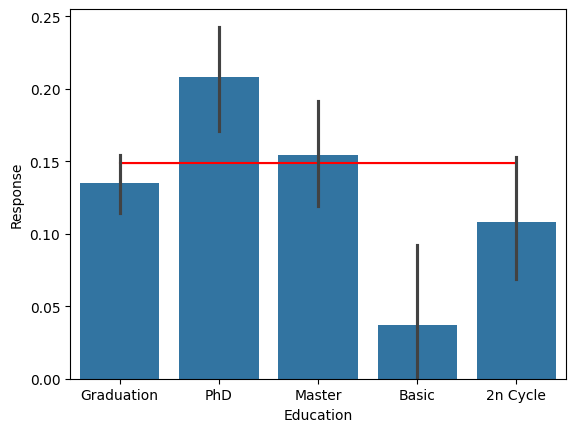

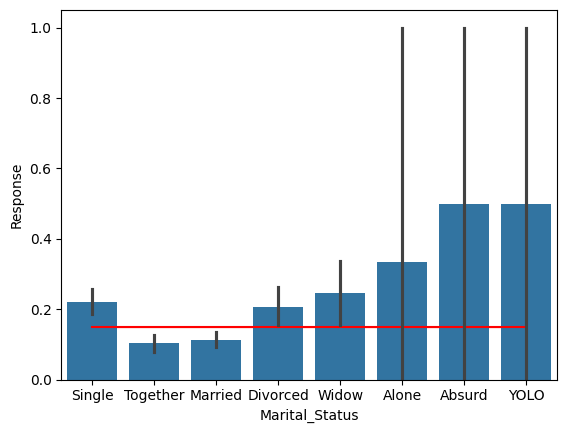

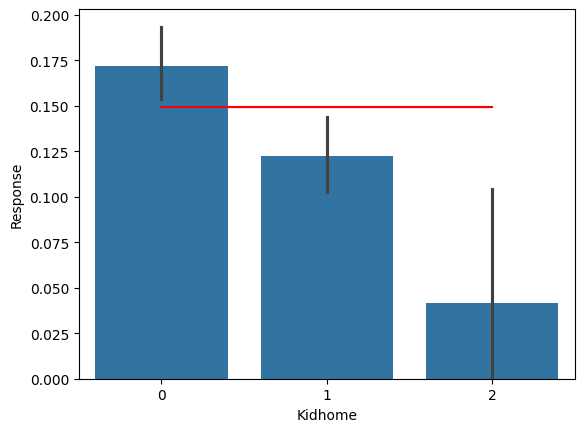

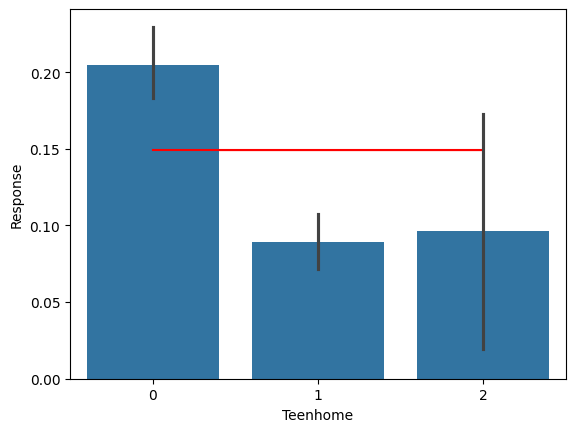

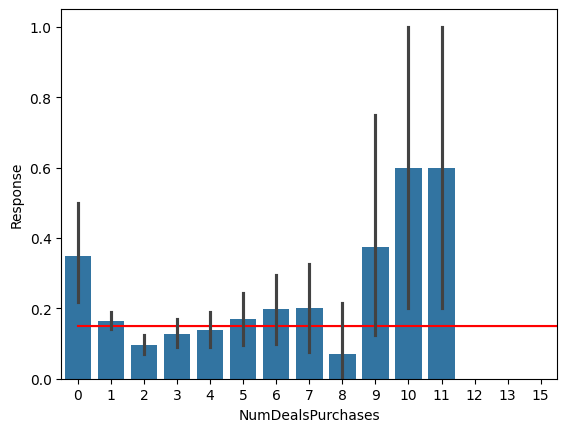

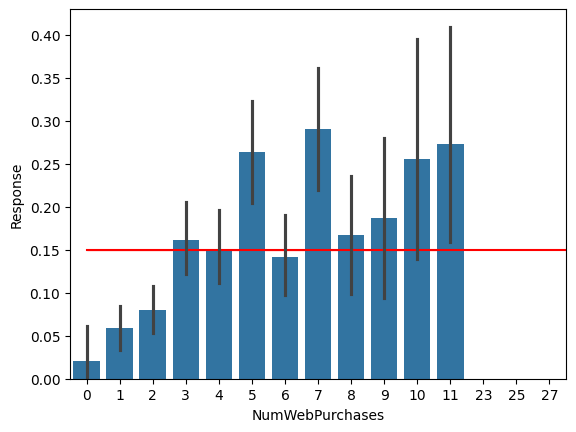

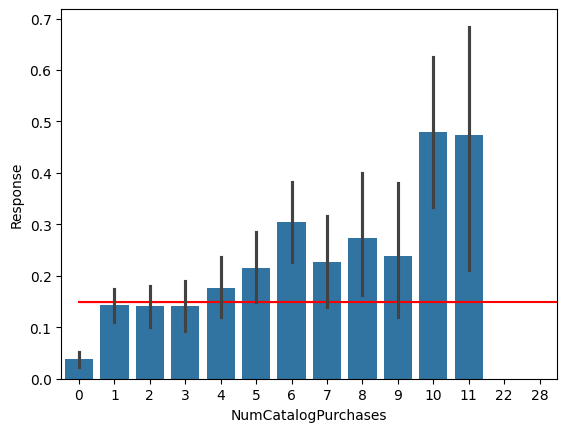

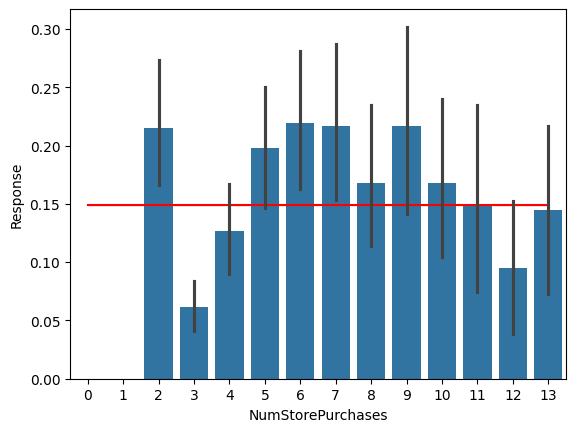

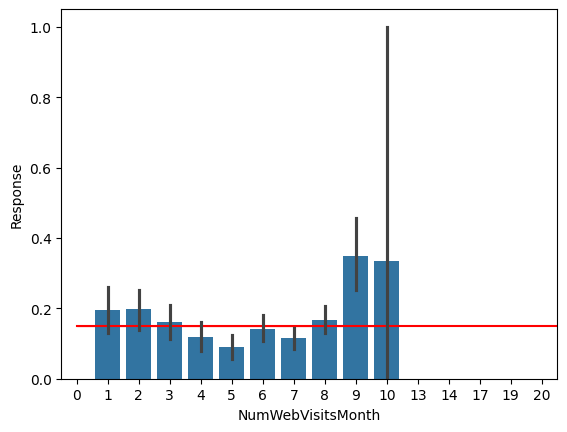

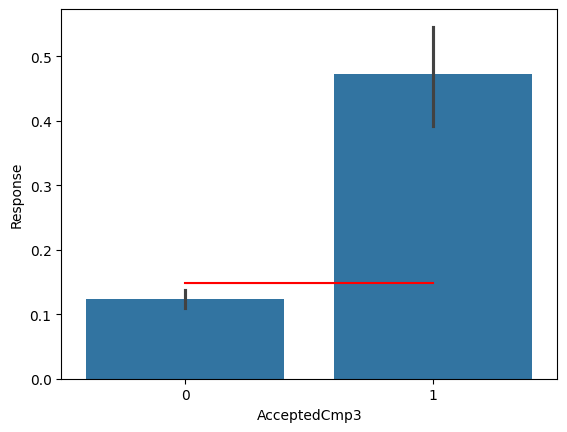

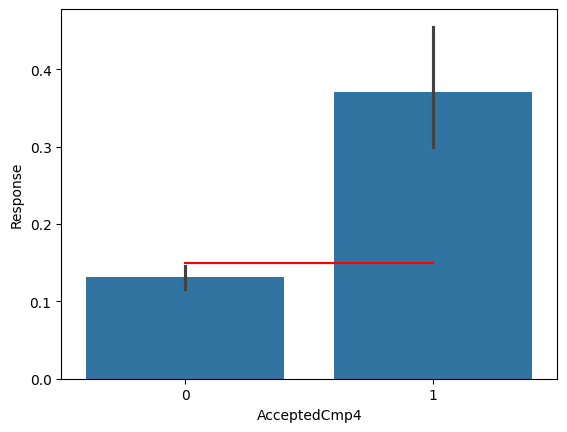

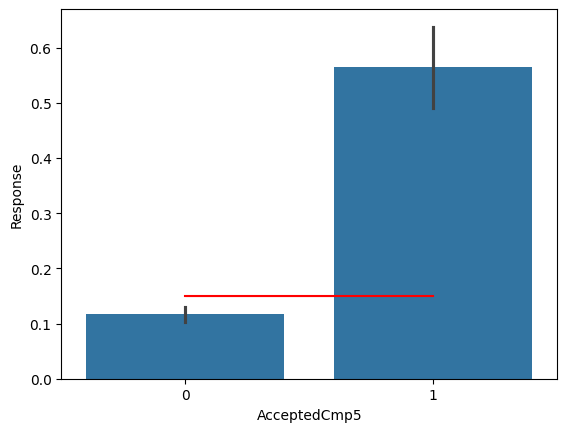

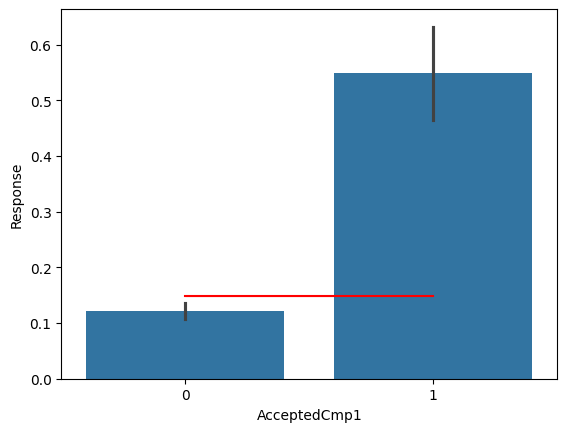

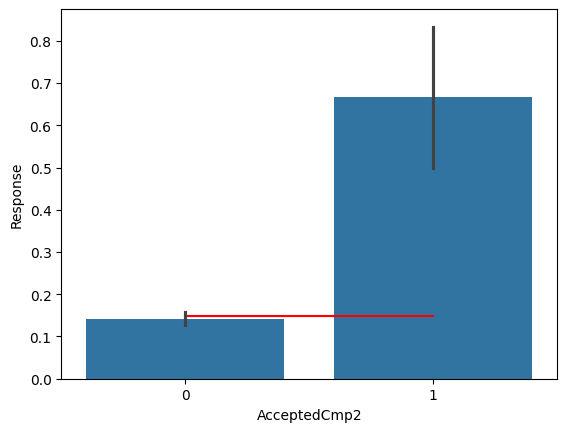

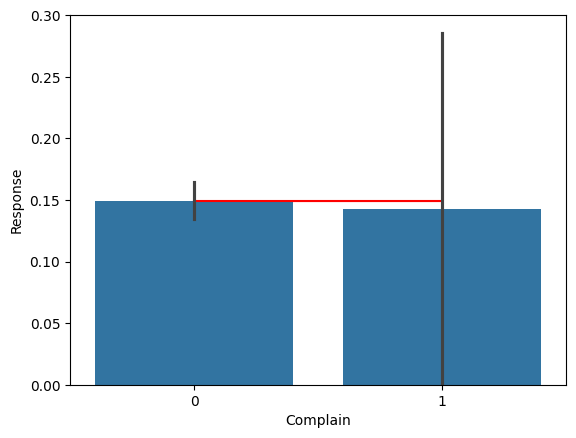

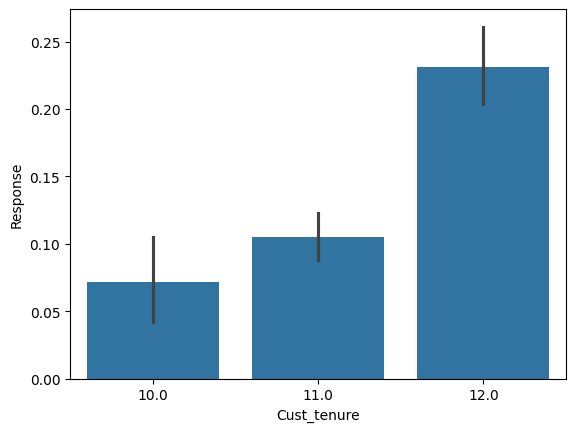

In [177]:
import matplotlib.pyplot as plt
X_char_merged = pd.concat([Y,char],axis=1, join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col, y=X_char_merged['Response'].mean(), data=X_char_merged, color='red')
    sns.barplot(x=col, y="Response", data=X_char_merged, estimator=mean)
plt.show()

In [178]:
char.dtypes

Education              object
Marital_Status         object
Kidhome                object
Teenhome               object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Cust_tenure            object
dtype: object

In [179]:
char_droplist=['Education','NumStorePurchases','Complain']
char=char.drop(char_droplist,axis=1)
char.shape

(2240, 13)

In [180]:
# Create dummy features with n-1 levels

X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(2240, 74)

### Select K Best

In [181]:
# Select K Best for categorical Features

from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=70)
selector.fit_transform(X_char_dum, Y)

# Get columns to keep and create new dataframe with those only

cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols].astype(int)

In [182]:
select_features_df_char.head()

,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Kidhome_1,Kidhome_2,Teenhome_1,Teenhome_2,NumDealsPurchases_1,NumDealsPurchases_2,NumDealsPurchases_3,NumDealsPurchases_4,NumDealsPurchases_5,NumDealsPurchases_6,NumDealsPurchases_7,NumDealsPurchases_8,NumDealsPurchases_9,NumDealsPurchases_10,NumDealsPurchases_11,NumDealsPurchases_12,NumDealsPurchases_13,NumDealsPurchases_15,NumWebPurchases_1,NumWebPurchases_2,NumWebPurchases_3,NumWebPurchases_5,NumWebPurchases_7,NumWebPurchases_8,NumWebPurchases_9,NumWebPurchases_10,NumWebPurchases_11,NumWebPurchases_23,NumWebPurchases_25,NumWebPurchases_27,NumCatalogPurchases_1,NumCatalogPurchases_4,NumCatalogPurchases_5,NumCatalogPurchases_6,NumCatalogPurchases_7,NumCatalogPurchases_8,NumCatalogPurchases_9,NumCatalogPurchases_10,NumCatalogPurchases_11,NumCatalogPurchases_22,NumCatalogPurchases_28,NumWebVisitsMonth_1,NumWebVisitsMonth_2,NumWebVisitsMonth_3,NumWebVisitsMonth_4,NumWebVisitsMonth_5,NumWebVisitsMonth_6,NumWebVisitsMonth_7,NumWebVisitsMonth_8,NumWebVisitsMonth_9,NumWebVisitsMonth_10,NumWebVisitsMonth_13,NumWebVisitsMonth_14,NumWebVisitsMonth_17,NumWebVisitsMonth_19,NumWebVisitsMonth_20,AcceptedCmp3_1,AcceptedCmp4_1,AcceptedCmp5_1,AcceptedCmp1_1,AcceptedCmp2_1,Cust_tenure_11.0,Cust_tenure_12.0
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [183]:
select_features_df_char.dtypes

Marital_Status_Alone       int32
Marital_Status_Divorced    int32
Marital_Status_Married     int32
Marital_Status_Single      int32
Marital_Status_Together    int32
                           ...  
AcceptedCmp5_1             int32
AcceptedCmp1_1             int32
AcceptedCmp2_1             int32
Cust_tenure_11.0           int32
Cust_tenure_12.0           int32
Length: 70, dtype: object

## Creating the master Feature Set fo Model Development

In [184]:
X_all = pd.concat([select_features_df_char, select_features_df_num], axis=1, join="inner")
X_all.shape


(2240, 76)

## Dimensionality Reduction Through Variable Clustering

In [185]:
from varclushi import VarClusHi
vc = VarClusHi(X_all, maxeigval2=1, maxclus=None)
vc.varclus()

In [186]:
vc.info

,Cluster,N_Vars,Eigval1,Eigval2,VarProp
0,0,10,4.385481,0.939496,0.438548
1,1,4,1.883289,0.993887,0.470822
2,2,5,1.863664,0.981420,0.372733
3,3,2,1.533925,0.466075,0.766963
4,4,3,1.590210,0.835650,0.530070
5,5,2,1.468390,0.531610,0.734195
6,6,4,1.228895,0.992660,0.307224
7,7,3,1.081366,0.999005,0.360455
8,8,3,1.189681,0.994075,0.396560
9,9,2,1.035987,0.964013,0.517994


In [187]:
check=vc.rsquare
check

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,Kidhome_1,0.419387,0.106304,0.649676
1,0,Income,0.731029,0.174810,0.325950
2,0,MntWines,0.571740,0.277039,0.592369
3,0,MntFruits,0.532523,0.094448,0.516234
4,0,MntMeatProducts,0.696453,0.152044,0.357975
...,...,...,...,...,...
71,30,NumWebVisitsMonth_17,1.000000,0.002379,0.000000
72,31,NumWebPurchases_23,1.000000,0.008773,0.000000
73,32,NumDealsPurchases_12,1.000000,0.005236,0.000000
74,33,NumCatalogPurchases_28,1.000000,0.061472,0.000000


In [188]:
filter=check[check['RS_Ratio']<=0.5]
filter.shape

(47, 5)

In [189]:
final_features=filter['Variable']
X_all=X_all[final_features]
X_all.shape

(2240, 47)

## Train Test Split

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size=0.3, random_state=20)

In [191]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (1568, 47)
Shape of Testing Data (672, 47)
Response Rate in Training Data Response    0.149872
dtype: float64
Response Rate in Testing Data Response    0.147321
dtype: float64


## Building Logistic Regression Model

In [192]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=20)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=20)

## Building Decision Tree Model

In [193]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini', random_state=20)

## Grid Search for Model Optimization

In [194]:
# Min_samples_Split starting from 5% of training base
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [75, 100, 125, 150] }
tree_grid = GridSearchCV(dtree, cv=10, param_grid=param_dist, n_jobs = 3)
tree_grid.fit(X_train, y_train)
print('Best parameters using grid search: \n', tree_grid.best_params_)

Best parameters using grid search: 
 {'max_depth': 5, 'min_samples_split': 75}


In [195]:
dtree=DecisionTreeClassifier(criterion='gini', random_state=20, max_depth=5, min_samples_split=75)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=75, random_state=20)

## Building Random Forest Model

In [196]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini', random_state=20, max_depth=5, min_samples_split=75)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=75, random_state=20)

## Building Gradient Bossting Model

In [197]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='squared_error', random_state=20, max_depth=5, min_samples_split=75)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(criterion='squared_error', max_depth=5,
                           min_samples_split=75, random_state=20)

## Model Evalution

In [198]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [199]:
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)

In [200]:
print("Accuracy from Logistic Regression Model :",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision from Logistic Regression Model :",metrics.precision_score(y_test,y_pred_logreg))
print("Recall from Logistic Regression Model :",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score from Logistic Regression Model :",metrics.f1_score(y_test,y_pred_logreg))
print("Area under ROC Curve from Logistic Regression Model :",metrics.roc_auc_score(y_test,y_pred_logreg))
print("Gini from the Logistic Regression Model :",2*metrics.roc_auc_score(y_test,y_pred_logreg)-1)

Accuracy from Logistic Regression Model : 0.8616071428571429
Precision from Logistic Regression Model : 0.6153846153846154
Recall from Logistic Regression Model : 0.16161616161616163
f1_score from Logistic Regression Model : 0.256
Area under ROC Curve from Logistic Regression Model : 0.5720820773176793
Gini from the Logistic Regression Model : 0.1441641546353587


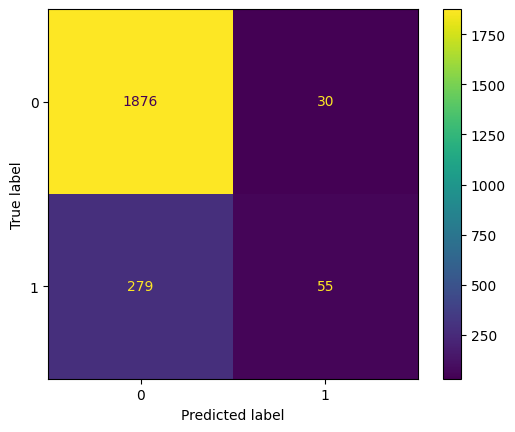

In [201]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(logreg, X_all, Y)
plt.show()

In [202]:
print("Accuracy from Decision Tree Model :",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision from Decision Tree Model :",metrics.precision_score(y_test,y_pred_tree))
print("Recall from Decision Tree Model :",metrics.recall_score(y_test,y_pred_tree))
print("f1_score from Decision Tree Model :",metrics.f1_score(y_test,y_pred_tree))
print("Area under ROC Curve from Decision Tree Model :",metrics.roc_auc_score(y_test,y_pred_tree))
print("Gini from the Decision Tree Model :",2*metrics.roc_auc_score(y_test,y_pred_tree)-1)

Accuracy from Decision Tree Model : 0.8720238095238095
Precision from Decision Tree Model : 0.696969696969697
Recall from Decision Tree Model : 0.23232323232323232
f1_score from Decision Tree Model : 0.3484848484848485
Area under ROC Curve from Decision Tree Model : 0.6074356126712147
Gini from the Decision Tree Model : 0.21487122534242942


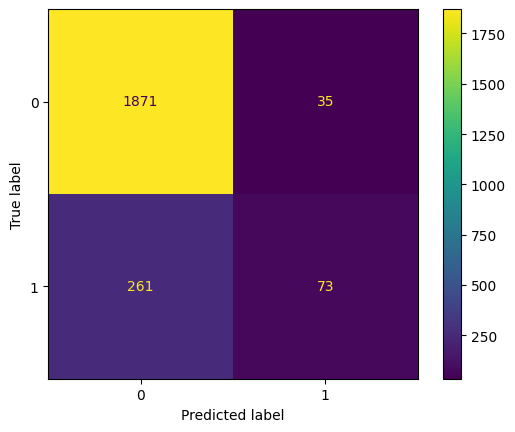

In [203]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(dtree, X_all, Y)
plt.show()

In [204]:
print("Accuracy from Random Forest Model :",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision from Random Forest Model :",metrics.precision_score(y_test,y_pred_rf))
print("Recall from Random Forest Model :",metrics.recall_score(y_test,y_pred_rf))
print("f1_score from Random Forest Model :",metrics.f1_score(y_test,y_pred_rf))
print("Area under ROC Curve from Random Forest Model :",metrics.roc_auc_score(y_test,y_pred_rf))
print("Gini from the Random Forest Model :",2*metrics.roc_auc_score(y_test,y_pred_rf)-1)

Accuracy from Random Forest Model : 0.8526785714285714
Precision from Random Forest Model : 0.0
Recall from Random Forest Model : 0.0
f1_score from Random Forest Model : 0.0
Area under ROC Curve from Random Forest Model : 0.5
Gini from the Random Forest Model : 0.0


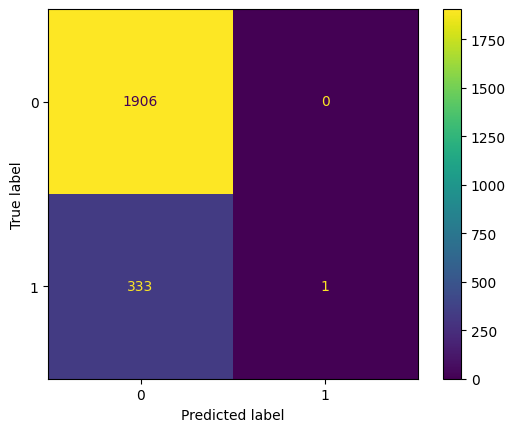

In [205]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(rf, X_all, Y)
plt.show()

In [206]:
print("Accuracy from GBM Model :",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision from GBM Model :",metrics.precision_score(y_test,y_pred_gbm))
print("Recall from GBM Model :",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score from GBM Model :",metrics.f1_score(y_test,y_pred_gbm))
print("Area under ROC Curve from GBM Model :",metrics.roc_auc_score(y_test,y_pred_gbm))
print("Gini from the GBM Model :",2*metrics.roc_auc_score(y_test,y_pred_gbm)-1)

Accuracy from GBM Model : 0.8794642857142857
Precision from GBM Model : 0.6875
Recall from GBM Model : 0.3333333333333333
f1_score from GBM Model : 0.4489795918367347
Area under ROC Curve from GBM Model : 0.6535776614310645
Gini from the GBM Model : 0.3071553228621291


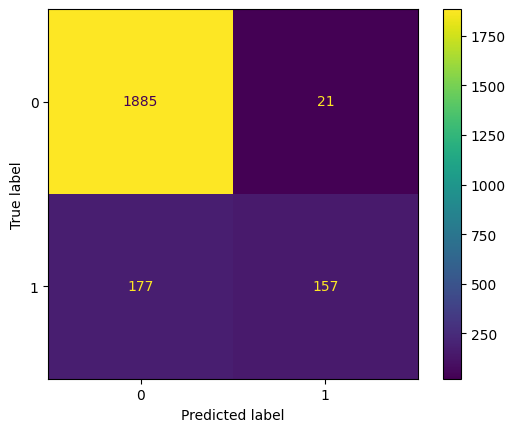

In [207]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(gbm, X_all, Y)
plt.show()

## Extracting Feature Importance from the best model

In [208]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',
                                                                     ascending=False)
feature_importances.shape

(47, 1)

## Extracting the Top 10 Important Model Features

In [209]:
feature_importances.iloc[0:10]

,importance
Income,0.271511
MntMeatProducts,0.214654
AcceptedCmp3_1,0.111893
MntFishProducts,0.076698
Cust_tenure_12.0,0.071252
NumCatalogPurchases_10,0.024477
NumWebPurchases_7,0.019579
NumDealsPurchases_10,0.017809
Marital_Status_Single,0.017768
Marital_Status_Together,0.017605


## Ploting the top 10 feature importances in a Horizontal Bar plot

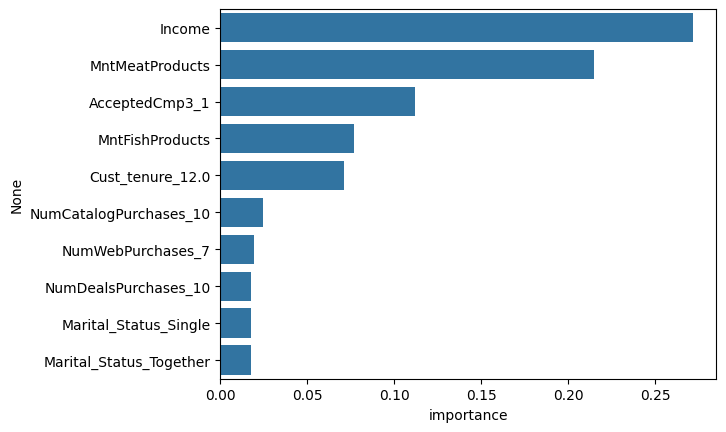

In [210]:
ax=sns.barplot(x='importance', y=feature_importances.iloc[0:10].index, data=feature_importances.iloc[0:10])

## Probability Decile Analysis and Gains Chart/ Lorenz Curve

## Step 1: Getting the Model Probabilities

In [215]:
y_pred_prob = gbm.predict_proba(X_all)[:,1]  # Getting Model Probabilities
df['pred_prob']=pd.DataFrame(y_pred_prob)

## Step 2: Create Deciles based on the model Probabilities

In [218]:
df['P_Rank_gbm']=pd.qcut(df['pred_prob'].rank(method='first').values,10,duplicates='drop').codes+1
df[['pred_prob','P_Rank_gbm']].head()

,pred_prob,P_Rank_gbm
0,0.766038,10
1,0.004899,1
2,0.034268,3
3,0.049703,4
4,0.020389,2


## Step 3: Summarize the data at decile Level for Analysis

In [99]:
rank_df=df.groupby('P_Rank_gbm')['Response'].agg(['count','mean']).sort_values(by='P_Rank_gbm', ascending=False)
rank_df.rename(columns={'mean':'Actual_event_rate'}, inplace=True)
rank_df

,count,Actual_event_rate
P_Rank_gbm,,
10,224,0.852679
9,224,0.339286
8,224,0.125000
7,224,0.066964
6,224,0.017857
5,224,0.040179
4,224,0.031250
3,224,0.004464
2,224,0.004464


## Step 4: Event Capture Analysis across Probability Deciles

In [100]:
rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
rank_df['cum_events']=rank_df['N_events'].cumsum()
rank_df['event_cap']=rank_df['N_events']/max(rank_df['N_events'].cumsum())
rank_df['cum_event_cap']=rank_df['event_cap'].cumsum()
rank_df

,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap
P_Rank_gbm,,,,,,
10,224,0.852679,191.0,191.0,0.571856,0.571856
9,224,0.339286,76.0,267.0,0.227545,0.799401
8,224,0.125000,28.0,295.0,0.083832,0.883234
7,224,0.066964,15.0,310.0,0.044910,0.928144
6,224,0.017857,4.0,314.0,0.011976,0.940120
5,224,0.040179,9.0,323.0,0.026946,0.967066
4,224,0.031250,7.0,330.0,0.020958,0.988024
3,224,0.004464,1.0,331.0,0.002994,0.991018
2,224,0.004464,1.0,332.0,0.002994,0.994012


## Step 5: Non Event Capture Analysis across Probability Deciles

In [101]:
rank_df['N_non_events']=rank_df['count']-rank_df['N_events']
rank_df['cum_non_events']=rank_df['N_non_events'].cumsum()
rank_df['non_event_cap']=rank_df['N_non_events']/max(rank_df['N_non_events'].cumsum())
rank_df['cum_non_event_cap']=rank_df['non_event_cap'].cumsum()
rank_df

,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap
P_Rank_gbm,,,,,,,,,,
10,224,0.852679,191.0,191.0,0.571856,0.571856,33.0,33.0,0.017314,0.017314
9,224,0.339286,76.0,267.0,0.227545,0.799401,148.0,181.0,0.077650,0.094963
8,224,0.125000,28.0,295.0,0.083832,0.883234,196.0,377.0,0.102833,0.197796
7,224,0.066964,15.0,310.0,0.044910,0.928144,209.0,586.0,0.109654,0.307450
6,224,0.017857,4.0,314.0,0.011976,0.940120,220.0,806.0,0.115425,0.422875
5,224,0.040179,9.0,323.0,0.026946,0.967066,215.0,1021.0,0.112802,0.535677
4,224,0.031250,7.0,330.0,0.020958,0.988024,217.0,1238.0,0.113851,0.649528
3,224,0.004464,1.0,331.0,0.002994,0.991018,223.0,1461.0,0.116999,0.766527
2,224,0.004464,1.0,332.0,0.002994,0.994012,223.0,1684.0,0.116999,0.883526


## Step 6: Compute KS Statistics and Lift over Baseline Event Rate

In [102]:
rank_df['KS']=round((rank_df['cum_event_cap']-rank_df['cum_non_event_cap']),4)
rank_df['Baseline_Event_Rate']=(max(rank_df['cum_events'])/max(rank_df['count'].cumsum()))
rank_df['Lift_over_avg']=rank_df['Actual_event_rate']/rank_df['Baseline_Event_Rate']
rank_df

,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,Baseline_Event_Rate,Lift_over_avg
P_Rank_gbm,,,,,,,,,,,,,
10,224,0.852679,191.0,191.0,0.571856,0.571856,33.0,33.0,0.017314,0.017314,0.5545,0.149107,5.718563
9,224,0.339286,76.0,267.0,0.227545,0.799401,148.0,181.0,0.077650,0.094963,0.7044,0.149107,2.275449
8,224,0.125000,28.0,295.0,0.083832,0.883234,196.0,377.0,0.102833,0.197796,0.6854,0.149107,0.838323
7,224,0.066964,15.0,310.0,0.044910,0.928144,209.0,586.0,0.109654,0.307450,0.6207,0.149107,0.449102
6,224,0.017857,4.0,314.0,0.011976,0.940120,220.0,806.0,0.115425,0.422875,0.5172,0.149107,0.119760
5,224,0.040179,9.0,323.0,0.026946,0.967066,215.0,1021.0,0.112802,0.535677,0.4314,0.149107,0.269461
4,224,0.031250,7.0,330.0,0.020958,0.988024,217.0,1238.0,0.113851,0.649528,0.3385,0.149107,0.209581
3,224,0.004464,1.0,331.0,0.002994,0.991018,223.0,1461.0,0.116999,0.766527,0.2245,0.149107,0.029940
2,224,0.004464,1.0,332.0,0.002994,0.994012,223.0,1684.0,0.116999,0.883526,0.1105,0.149107,0.029940


## Step 7: Create Deciles (1-10) column to indicate the Deciles number

In [103]:
rank_df=rank_df.reset_index()
rank_df['Decile']=rank_df.index+1
rank_df

,P_Rank_gbm,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,Baseline_Event_Rate,Lift_over_avg,Decile
0,10,224,0.852679,191.0,191.0,0.571856,0.571856,33.0,33.0,0.017314,0.017314,0.5545,0.149107,5.718563,1
1,9,224,0.339286,76.0,267.0,0.227545,0.799401,148.0,181.0,0.077650,0.094963,0.7044,0.149107,2.275449,2
2,8,224,0.125000,28.0,295.0,0.083832,0.883234,196.0,377.0,0.102833,0.197796,0.6854,0.149107,0.838323,3
3,7,224,0.066964,15.0,310.0,0.044910,0.928144,209.0,586.0,0.109654,0.307450,0.6207,0.149107,0.449102,4
4,6,224,0.017857,4.0,314.0,0.011976,0.940120,220.0,806.0,0.115425,0.422875,0.5172,0.149107,0.119760,5
5,5,224,0.040179,9.0,323.0,0.026946,0.967066,215.0,1021.0,0.112802,0.535677,0.4314,0.149107,0.269461,6
6,4,224,0.031250,7.0,330.0,0.020958,0.988024,217.0,1238.0,0.113851,0.649528,0.3385,0.149107,0.209581,7
7,3,224,0.004464,1.0,331.0,0.002994,0.991018,223.0,1461.0,0.116999,0.766527,0.2245,0.149107,0.029940,8
8,2,224,0.004464,1.0,332.0,0.002994,0.994012,223.0,1684.0,0.116999,0.883526,0.1105,0.149107,0.029940,9
9,1,224,0.008929,2.0,334.0,0.005988,1.000000,222.0,1906.0,0.116474,1.000000,0.0000,0.149107,0.059880,10


## Visualizing the performance of model probabilities across Deciles

## Step 8: Create the rank ordering chart

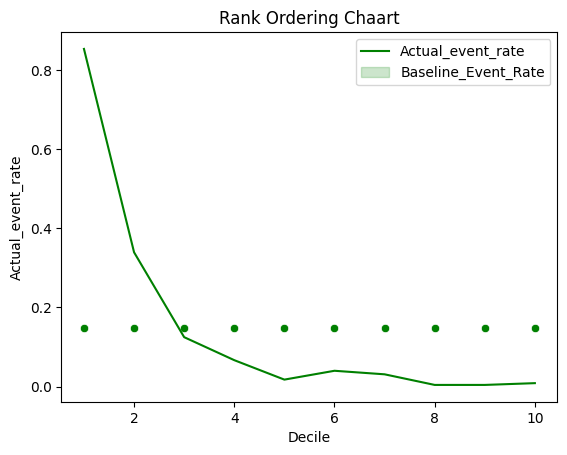

In [219]:
ax = sns.lineplot(x="Decile", y="Actual_event_rate", data=rank_df, color='green').set_title('Rank Ordering Chaart')
ax =sns.scatterplot(x="Decile", y="Baseline_Event_Rate", data=rank_df, color="green")
ax.legend(['Actual_event_rate', 'Baseline_Event_Rate'])

## Step 9: Create the lift chart

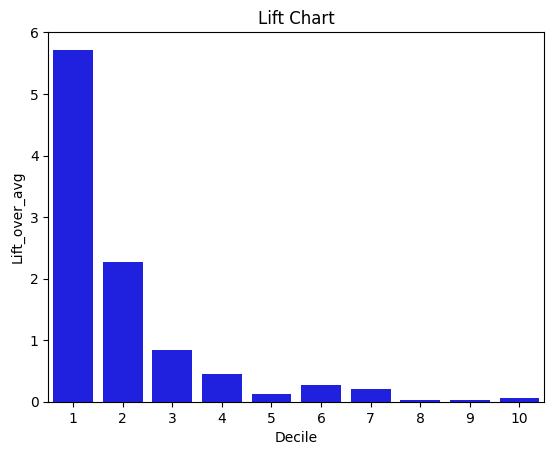

In [105]:
ax = sns.barplot( x="Decile", y="Lift_over_avg",
                 data=rank_df, color='blue').set_title('Lift Chart')

## Step 10: Create the Gains Chart/ Lorenz Curve

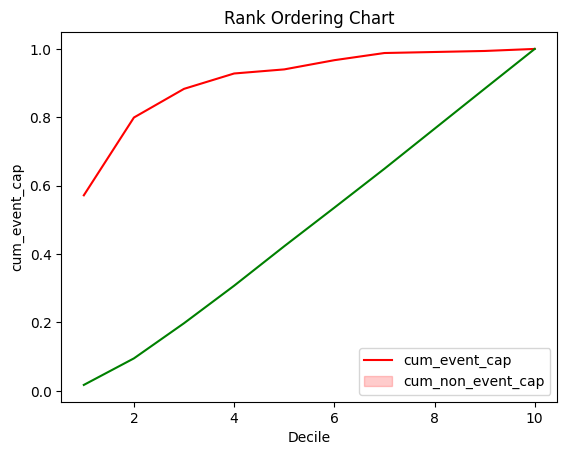

In [106]:
ax = sns.lineplot(x="Decile", y="cum_event_cap",
                  data=rank_df, color='red'). set_title('Rank Ordering Chart')
ax = sns.lineplot(x="Decile", y="cum_non_event_cap", data=rank_df, color='green')
ax.legend(['cum_event_cap', 'cum_non_event_cap'])

## Is our Model able to maximise Event/ Non Event Discrimation by the Top 3 deciles?

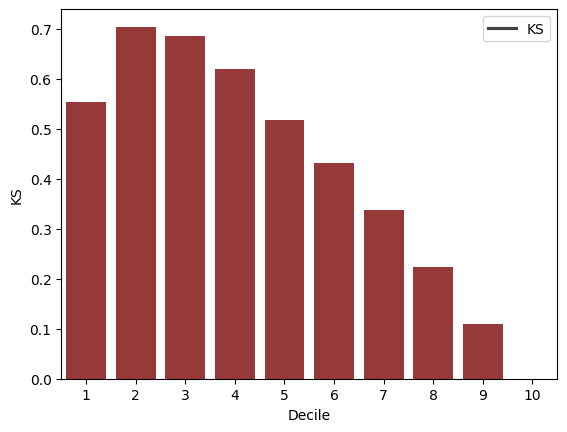

In [107]:
ax = sns.barplot(x="Decile", y="KS", data=rank_df, color="brown")
ax.legend(['KS'])

## Utilize APT framework to build a Machine Learning Driven Strategy

## A - Audience (Who do we target ?)

In [108]:
df['Predicted_Resp_Rank']=np.where(df['P_Rank_gbm']>=9,"Top 2","Bottom 8")
df['Predicted_Resp_Rank'].value_counts()

Predicted_Resp_Rank
Bottom 8    1792
Top 2        448
Name: count, dtype: int64

In [109]:
df_top2=df.loc[df['Predicted_Resp_Rank']=="Top 2",:]
df_top2.shape

(448, 31)

## Prioritization (BAsed on Business Value and Customer Engagement)

In [110]:
df_top2['spend_cnt']=np.count_nonzero(df_top2[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']],axis=1)
df_top2['spend_cnt'].describe()                                            

count    448.000000
mean       5.618304
std        0.716894
min        3.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        6.000000
Name: spend_cnt, dtype: float64

In [111]:
df_top2['Engagement']=np.where(df_top2['spend_cnt']<df_top2['spend_cnt'].quantile(0.75),"Low", "High")
df_top2['Engagement'].value_counts()

Engagement
High    324
Low     124
Name: count, dtype: int64

In [112]:
df_top2['Total_Spend']=df_top2['MntWines']+df_top2['MntFruits']+df_top2['MntMeatProducts']+df_top2['MntFishProducts']+df_top2['MntSweetProducts']+df_top2['MntGoldProds']
df_top2['Total_Spend'].describe()

count     448.000000
mean     1030.660714
std       693.874971
min        16.000000
25%       377.000000
50%      1100.500000
75%      1615.000000
max      2525.000000
Name: Total_Spend, dtype: float64

In [113]:
df_top2['spend_level']=np.where(df_top2['Total_Spend']<df_top2['Total_Spend'].quantile(0.75),"Low Spend","High Spend")
df_top2['spend_level'].value_counts()

spend_level
Low Spend     335
High Spend    113
Name: count, dtype: int64

In [114]:
pd.crosstab(index=df_top2['spend_level'], columns=df_top2['Engagement'], values=df_top2['Response'], aggfunc="mean")

Engagement,High,Low
spend_level,,
High Spend,0.690722,0.875000
Low Spend,0.572687,0.518519


In [115]:
pd.crosstab(index=df_top2['spend_level'], columns=df_top2['Engagement'],values=df_top2['Response'],aggfunc='count')

Engagement,High,Low
spend_level,,
High Spend,97,16
Low Spend,227,108


In [116]:
df_priority_1=df_top2.loc[(df_top2['spend_level']=='High Spend') & (df_top2['Engagement']=='Low'),:]
df_priority_1.shape

(16, 35)

In [117]:
df_priority_2=df_top2.loc[(df_top2['spend_level']=='High Spend') & (df_top2['Engagement']=='High'),:]
df_priority_2.shape

(97, 35)

In [118]:
df_priority_3=df_top2.loc[(df_top2['spend_level']=='Low Spend') &
                            (df_top2['Engagement']=='High'),:]
df_priority_3.shape

(227, 35)

In [119]:
df_priority_4=df_top2.loc[(df_top2['spend_level']=='Low Spend') &
                            (df_top2['Engagement']=='Low'),:]
df_priority_4.shape

(108, 35)

## T - Treatment (Identify Service/Product Preferences of each Priority Segment)

In [120]:
spend_cat_priority1=df_priority_1[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                                   'MntSweetProducts', 'MntGoldProds']]

In [121]:
spend_avg = spend_cat_priority1.mean(axis=0).sort_values(ascending=False)
spend_avg

MntWines            1142.0000
MntMeatProducts      527.5000
MntGoldProds          79.4375
MntFruits             55.8750
MntFishProducts       43.0000
MntSweetProducts      18.5625
dtype: float64

In [122]:
spend_cat_priority2=df_priority_2[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntGoldProds']]

In [123]:
spend_avg = spend_cat_priority2.mean(axis=0).sort_values(ascending=False)
spend_avg

MntWines            917.432990
MntMeatProducts     664.917526
MntGoldProds         78.453608
MntSweetProducts     76.618557
MntFruits            73.061856
dtype: float64

In [124]:
spend_cat_priority3=df_priority_3[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

In [125]:
spend_avg = spend_cat_priority3.mean(axis=0).sort_values(ascending=False)
spend_avg

MntWines            339.308370
MntMeatProducts     251.277533
MntGoldProds         58.770925
MntFishProducts      53.577093
MntSweetProducts     41.330396
MntFruits            41.325991
dtype: float64

In [126]:
spend_cat_priority4=df_priority_4[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

In [127]:
spend_avg = spend_cat_priority4.mean(axis=0).sort_values(ascending=False)
spend_avg

MntWines            376.435185
MntMeatProducts     157.388889
MntGoldProds         51.518519
MntFishProducts      15.083333
MntFruits            14.407407
MntSweetProducts     12.055556
dtype: float64

# Project Report and Actionable Insights

## Objective of the Project

###### Leverage the spend behaviour and past campaign responses to build a response model that can be used to devise strategy that enhances the response rates and improves profitability of marketing campaigns.

## Baseline Event Rate

###### The response rate from the datis 14.9%.

## Algorithms Used

###### In this project we have logistic Regression, Decision Trees, Random Forests and Gradient Boosting Algorithms.

## Final Model Alogrithm

###### Among the models that we tried building the GBM Algorithm performed the best in the terms of F1_score, Area under the ROC curve and overall Model Gini. Therefore, we have kept GBM as final model algorithm.

## Grid Seach CV parameters

###### Maximaum Depth of the Tree - 5.
###### Minimum Sample size for Nodes to be Split - 75 Observations.

## Model Performance Measures

###### Accuracy - 0.86
###### Precision - 0.58
###### Recall - 0.25
###### F1 Score - 0.35
###### AUC - 0.61
###### Gini - 0.22

## Model Probability Discrimination Measures

###### Steady Event Rate Rank Ordering (Yes/No) - Yes
###### Rank Ordering Reversals in Top 3 Deciles (Yes/No)  - No
###### Model Lift over Baseline event rate in Top Deciles - 5.8
###### Cumulative Event Capture in the Top 3 Deciles - 90%
###### Maximum KS Satatistics Value - 0.74
###### Does KS Statistics Maximize within Top 3 Deciles (Yes/No) - Yes

## Top 10 drivers from the Model

###### Income
###### MntMeatProducts
###### AcceptedCmp3_1
###### MntFishProducts
###### MntFruits
###### Cust_Tenure_8.0
###### NumCatalogPurchase_10
###### Marital_Status_Together
###### Marital_Status_Single
###### Marital_staus_Married

## APT strategy Framework using the model

###### Raw Data: Baseline Response Rate: 334/2240 = 14.9
###### GBM Model with parameters: Max_depth = 5 ; Min_sample_split = 75
###### Model Probability: Response Rate in top 2 Deciles: 278/448 = 62%
###### APT Model strategy :
###### Audience: Top 2 Deciles - Best 20% Customer Bases :80% reduction in Marketing cost and 4.2 time higher response rate.
###### Prioritization: Priority 1: Low engagement and high spending
###### Prioritization: Priority 2: High engagement and high spending
###### Prioritization: Priority 3: High engagement and low spending
###### Prioritization: Priority 4: Low engagement and low spending
###### Treatment: The Best offers should be provided on the following products Wines/Fish/Meat/Gold.



